In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

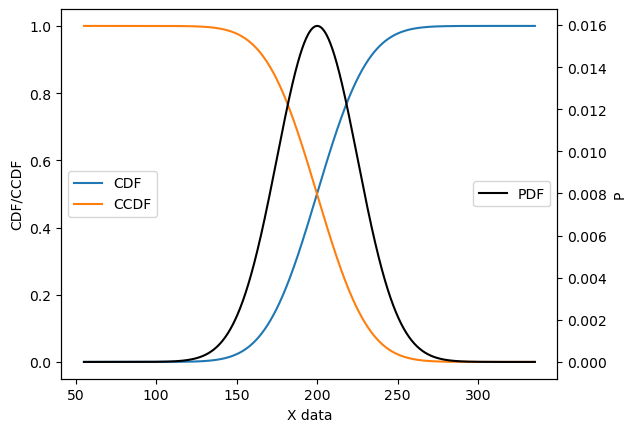

In [2]:
#Let's make up some data
mu1 = 200
mu2 = 150
mu3 = 250
sigma1 = 25
sigma2 = 25
sigma3 = 25

data1 = np.random.normal(mu1, sigma1, size=1000)
data2 = np.random.normal(mu2, sigma2, size=1000)
data3 = np.random.normal(mu3, sigma3, size=1000)

x = np.linspace(data2.min(), data3.max(), 1000)

# Equation for the normal probability distribution
y1 = ((1 / (np.sqrt(2 * np.pi) * sigma1)) * np.exp(-0.5 * (1 / sigma1 * (x - mu1))**2))
y2 = ((1 / (np.sqrt(2 * np.pi) * sigma2)) * np.exp(-0.5 * (1 / sigma2 * (x - mu2))**2))
y3 = ((1 / (np.sqrt(2 * np.pi) * sigma3)) * np.exp(-0.5 * (1 / sigma3 * (x - mu3))**2))

#The cumulative sum of the probabilities gives the CDF
y1cdf = y1.cumsum()

#Normalize the probabilities to be between 0 and 1
y1cdf /= y1cdf[-1]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1cdf, label = "CDF")
ax1.plot(x, 1-y1cdf, label = "CCDF")
ax2.plot(x, y1, color = "k", label = "PDF")

ax1.set_xlabel('X data')
ax1.set_ylabel('CDF/CCDF')
ax2.set_ylabel('P')

ax1.legend(loc = 'center left')
ax2.legend(loc = 'center right')
plt.savefig("CDF-CCDF.png", dpi = 300)
plt.show()

In [3]:
df = pd.read_csv('fayetteville-precip.csv')
df = df.set_index(['Year'])

df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Tot
Year,,,,,,,,,,,,,
1950,6.25,3.46,1.65,5.13,13.27,5.78,7.97,5.59,2.44,1.34,0.97,0.48,54.33
1951,2.44,8.00,1.76,3.76,2.28,9.80,2.13,3.18,4.27,5.51,3.67,0.98,47.78
1952,1.81,3.20,3.49,4.67,5.08,1.26,1.10,5.79,0.40,0.55,4.68,1.34,33.37
1953,1.88,1.13,7.50,7.59,4.65,0.18,4.75,1.79,1.32,2.78,1.9,2.24,37.71
1954,2.60,0.97,3.48,3.78,4.00,0.67,0.95,1.49,4.30,6.48,0.94,5.98,35.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,3.27,3.26,4.32,5.11,6.56,8.93,3.07,5.24,7.58,12.07,4.52,1.33,65.26
2020,5.50,3.47,7.19,4.00,7.54,2.44,4.24,1.14,2.49,6.8,2.16,2.89,49.83
2021,2.30,0.97,3.35,6.63,6.67,4.02,3.14,0.56,1.93,6.1,1.57,5.36,42.60


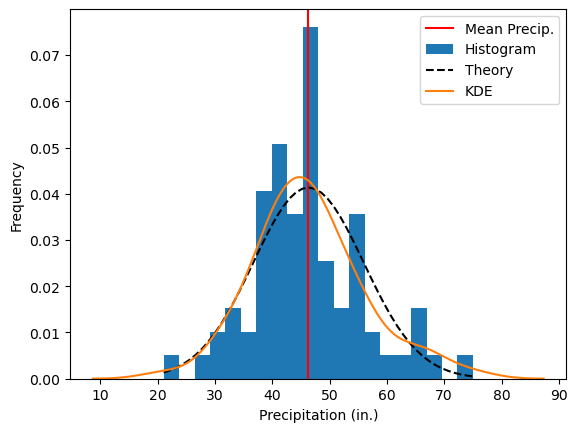

In [4]:
annualPrecip = df['Tot']

meanPrecip = np.mean(annualPrecip)
stdPrecip = np.std(annualPrecip)

x = np.linspace(annualPrecip.min(), annualPrecip.max())

# Equation for the normal probability distribution
y = ((1 / (np.sqrt(2 * np.pi) * stdPrecip)) * np.exp(-0.5 * (1 / stdPrecip * (x - meanPrecip))**2))

plt.axvline(meanPrecip, color ='red', label = "Mean Precip.") #Plot the mean precipitation
plt.hist(annualPrecip, bins = 20, density = True, label = "Histogram")
plt.plot(x, y, label = "Theory", color = "k", linestyle = 'dashed')
sns.kdeplot(x = annualPrecip, label = "KDE")
plt.xlabel("Precipitation (in.)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Cumulative Probability Density Function (CDF)

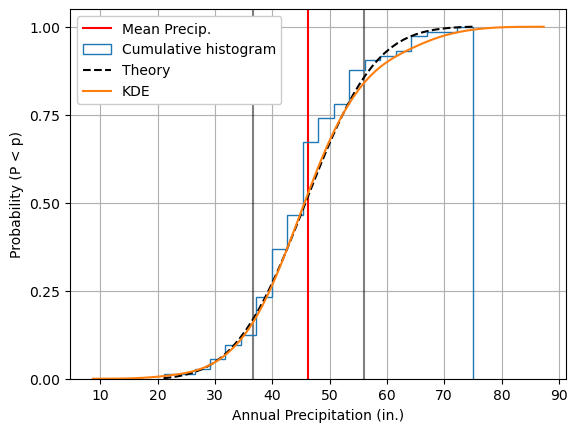

In [5]:
meanPrecip = np.mean(annualPrecip)
stdPrecip = np.std(annualPrecip)

x = np.linspace(annualPrecip.min(), annualPrecip.max())

# Equation for the normal probability distribution
y = ((1 / (np.sqrt(2 * np.pi) * stdPrecip)) * np.exp(-0.5 * (1 / stdPrecip * (x - meanPrecip))**2))

#The cumulative sum of the probabilities gives the CDF
y = y.cumsum()

#Normalize the probabilities to be between 0 and 1
y /= y[-1]


plt.axvline(meanPrecip, color ='red', label = "Mean Precip.") #Plot the mean precipitation
plt.axvline(meanPrecip - stdPrecip, color = 'k', alpha = 0.5)
plt.axvline(meanPrecip + stdPrecip, color = 'k', alpha = 0.5)
n, bins, patches = plt.hist(annualPrecip, 20, density=True, histtype="step", cumulative=True, label="Cumulative histogram")
plt.plot(x, y, "k--", linewidth=1.5, label="Theory") #Plot the theoretical distribution
sns.kdeplot(x = annualPrecip, cumulative = True, label = 'KDE')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel('Annual Precipitation (in.)')
plt.ylabel('Probability (P < p)')
plt.grid()
plt.legend(framealpha = 1)
plt.show()

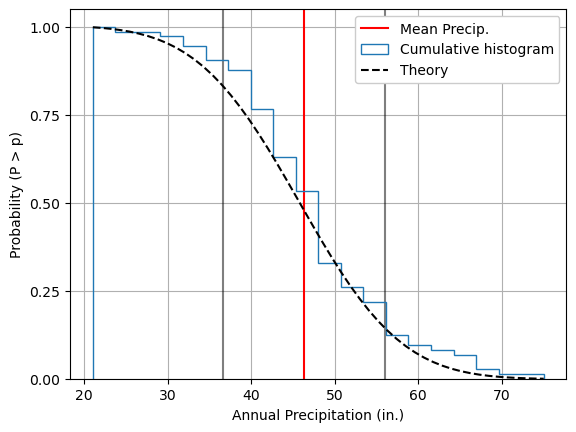

In [6]:
plt.axvline(meanPrecip, color ='red', label = "Mean Precip.") #Plot the mean precipitation
plt.axvline(meanPrecip - stdPrecip, color = 'k', alpha = 0.5)
plt.axvline(meanPrecip + stdPrecip, color = 'k', alpha = 0.5)
n, bins, patches = plt.hist(annualPrecip, 20, density=True, histtype="step", cumulative=-1, label="Cumulative histogram")
plt.plot(x, 1-y, "k--", linewidth=1.5, label="Theory") #Plot the theoretical distribution
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel('Annual Precipitation (in.)')
plt.ylabel('Probability (P > p)')
plt.grid()
plt.legend(framealpha = 1)
plt.show()

In [ ]:
total2023 = df.iloc[-1].sum()
total2023

In [ ]:
meanPrecip - total2023